# XGboost 

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./openData/train.csv")
df_t = pd.read_csv("./openData/test.csv")

In [122]:
df_t

,ID,img_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,HG,...,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation
0,BC_01_0011,./test_imgs/BC_01_0011.png,55,2015-11-17,2,2,1,23.0,2.0,2.0,...,1.0,8.0,0.0,2.0,5.00,0.0,1.0,NaN,NaN,NaN
1,BC_01_0220,./test_imgs/BC_01_0220.png,43,2020-06-09,4,2,1,13.0,3.0,2.0,...,1.0,4.0,1.0,8.0,8.67,0.0,0.0,NaN,NaN,NaN
2,BC_01_0233,./test_imgs/BC_01_0233.png,76,2020-05-14,1,1,1,NaN,NaN,NaN,...,1.0,6.0,1.0,6.0,NaN,NaN,2.0,NaN,NaN,NaN
3,BC_01_0258,./test_imgs/BC_01_0258.png,58,2020-05-20,1,2,1,1.3,2.0,2.0,...,1.0,7.0,0.0,NaN,21.17,1.0,3.0,NaN,NaN,0.0
4,BC_01_0260,./test_imgs/BC_01_0260.png,56,2020-05-20,1,2,2,15.0,3.0,3.0,...,1.0,8.0,1.0,3.0,20.57,1.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,BC_01_3328,./test_imgs/BC_01_3328.png,61,2009-10-30,1,1,1,18.0,2.0,2.0,...,1.0,5.0,1.0,3.0,NaN,0.0,0.0,NaN,NaN,NaN
246,BC_01_3404,./test_imgs/BC_01_3404.png,42,2009-05-19,1,2,1,20.0,1.0,2.0,...,1.0,5.0,1.0,5.0,NaN,0.0,1.0,NaN,NaN,NaN
247,BC_01_3418,./test_imgs/BC_01_3418.png,37,2009-04-24,1,1,1,17.0,1.0,1.0,...,1.0,5.0,1.0,5.0,NaN,0.0,0.0,NaN,NaN,NaN
248,BC_01_3438,./test_imgs/BC_01_3438.png,37,2009-02-06,1,1,1,7.0,1.0,1.0,...,1.0,5.0,1.0,5.0,NaN,0.0,0.0,NaN,NaN,NaN


In [123]:
df

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,./train_imgs/BC_01_0001.png,-,63,2015-10-23,1,2,1,19.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,NaN,NaN,NaN,0
1,BC_01_0002,./train_imgs/BC_01_0002.png,-,51,2015-10-28,1,1,1,22.0,3.0,...,NaN,0.0,NaN,70.0,0.0,0.0,NaN,NaN,NaN,1
2,BC_01_0003,./train_imgs/BC_01_0003.png,-,37,2015-10-29,1,2,1,NaN,2.0,...,7.0,1.0,4.0,7.0,0.0,1.0,NaN,NaN,0.0,0
3,BC_01_0004,./train_imgs/BC_01_0004.png,-,54,2016-03-08,1,2,1,0.0,3.0,...,NaN,0.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,0
4,BC_01_0005,./train_imgs/BC_01_0005.png,-,57,2015-10-30,1,2,1,8.0,2.0,...,8.0,0.0,NaN,8.0,1.0,2.0,1.0,5.44,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BC_01_3464,./train_imgs/BC_01_3464.png,-,65,2006-12-22,1,2,1,25.0,1.0,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1
996,BC_01_3482,./train_imgs/BC_01_3482.png,-,48,2006-11-17,1,1,1,7.0,1.0,...,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0
997,BC_01_3485,./train_imgs/BC_01_3485.png,-,64,2006-11-10,1,2,1,15.0,1.0,...,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1
998,BC_01_3502,./train_imgs/BC_01_3502.png,-,50,2006-09-22,1,1,1,7.0,1.0,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0


In [124]:
df.columns

Index(['ID', 'img_path', 'mask_path', '나이', '수술연월일', '진단명', '암의 위치', '암의 개수',
       '암의 장경', 'NG', 'HG', 'HG_score_1', 'HG_score_2', 'HG_score_3',
       'DCIS_or_LCIS_여부', 'DCIS_or_LCIS_type', 'T_category', 'ER',
       'ER_Allred_score', 'PR', 'PR_Allred_score', 'KI-67_LI_percent', 'HER2',
       'HER2_IHC', 'HER2_SISH', 'HER2_SISH_ratio', 'BRCA_mutation',
       'N_category'],
      dtype='object')

In [125]:
# 'img_path'와 'mask_path' 컬럼 삭제하기
df_t = df_t.drop(['ID','img_path', '수술연월일',], axis=1)
df_1 = df.drop(['img_path', 'mask_path', '수술연월일',], axis=1)

df_1['암의 장경'] = df_1['암의 장경'].fillna(df_1['암의 장경'].mean())
df_1 = df_1.fillna(0)
df_1

,ID,나이,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,63,1,2,1,19.000000,2.0,1.0,2.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,0.0,0.00,0.0,0
1,BC_01_0002,51,1,1,1,22.000000,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.00,0.0,1
2,BC_01_0003,37,1,2,1,18.375564,2.0,0.0,0.0,0.0,...,7.0,1.0,4.0,7.0,0.0,1.0,0.0,0.00,0.0,0
3,BC_01_0004,54,1,2,1,0.000000,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.00,0.0,0
4,BC_01_0005,57,1,2,1,8.000000,2.0,2.0,3.0,2.0,...,8.0,0.0,0.0,8.0,1.0,2.0,1.0,5.44,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BC_01_3464,65,1,2,1,25.000000,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
996,BC_01_3482,48,1,1,1,7.000000,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0
997,BC_01_3485,64,1,2,1,15.000000,1.0,1.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
998,BC_01_3502,50,1,1,1,7.000000,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0


In [126]:
df_t

,나이,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,HG_score_3,...,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation
0,55,2,2,1,23.0,2.0,2.0,3.0,2.0,1.0,...,1.0,8.0,0.0,2.0,5.00,0.0,1.0,NaN,NaN,NaN
1,43,4,2,1,13.0,3.0,2.0,2.0,3.0,1.0,...,1.0,4.0,1.0,8.0,8.67,0.0,0.0,NaN,NaN,NaN
2,76,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,1.0,6.0,NaN,NaN,2.0,NaN,NaN,NaN
3,58,1,2,1,1.3,2.0,2.0,3.0,2.0,1.0,...,1.0,7.0,0.0,NaN,21.17,1.0,3.0,NaN,NaN,0.0
4,56,1,2,2,15.0,3.0,3.0,3.0,3.0,2.0,...,1.0,8.0,1.0,3.0,20.57,1.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,61,1,1,1,18.0,2.0,2.0,3.0,2.0,2.0,...,1.0,5.0,1.0,3.0,NaN,0.0,0.0,NaN,NaN,NaN
246,42,1,2,1,20.0,1.0,2.0,3.0,2.0,1.0,...,1.0,5.0,1.0,5.0,NaN,0.0,1.0,NaN,NaN,NaN
247,37,1,1,1,17.0,1.0,1.0,3.0,1.0,1.0,...,1.0,5.0,1.0,5.0,NaN,0.0,0.0,NaN,NaN,NaN
248,37,1,1,1,7.0,1.0,1.0,2.0,1.0,1.0,...,1.0,5.0,1.0,5.0,NaN,0.0,0.0,NaN,NaN,NaN


In [127]:
df_1 = df_1.rename(columns={'진단명': 'disease', '암의 위치': "Tumor location",'암의 개수': "Number of tumors", '암의 장경': "Longest diameter of tumor", '나이': "age"})
df_t = df_t.rename(columns={'진단명': 'disease', '암의 위치': "Tumor location",'암의 개수': "Number of tumors", '암의 장경': "Longest diameter of tumor", '나이': "age"})

df_1

,ID,age,disease,Tumor location,Number of tumors,Longest diameter of tumor,NG,HG,HG_score_1,HG_score_2,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,63,1,2,1,19.000000,2.0,1.0,2.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,0.0,0.00,0.0,0
1,BC_01_0002,51,1,1,1,22.000000,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.00,0.0,1
2,BC_01_0003,37,1,2,1,18.375564,2.0,0.0,0.0,0.0,...,7.0,1.0,4.0,7.0,0.0,1.0,0.0,0.00,0.0,0
3,BC_01_0004,54,1,2,1,0.000000,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.00,0.0,0
4,BC_01_0005,57,1,2,1,8.000000,2.0,2.0,3.0,2.0,...,8.0,0.0,0.0,8.0,1.0,2.0,1.0,5.44,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BC_01_3464,65,1,2,1,25.000000,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
996,BC_01_3482,48,1,1,1,7.000000,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0
997,BC_01_3485,64,1,2,1,15.000000,1.0,1.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
998,BC_01_3502,50,1,1,1,7.000000,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0


C:\Users\2022A00528\AppData\Local\Temp\ipykernel_16096\4293055116.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_1.corr()
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.draw()
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


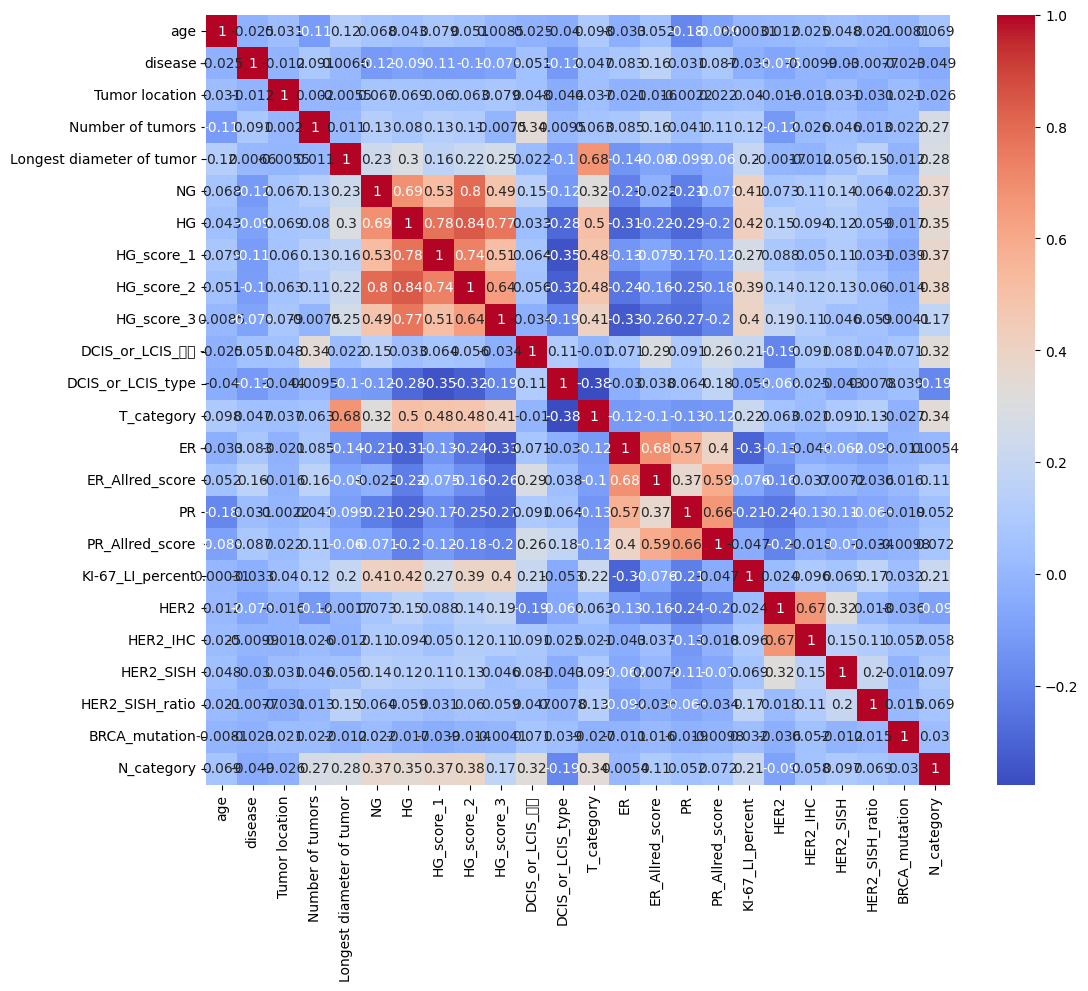

In [128]:
# 히트맵 크기 설정
plt.figure(figsize=(12, 10))

# 상관관계 계산하기
corr = df_1.corr()

# 히트맵 그리기
sns.heatmap(corr, cmap='coolwarm', annot=True)


In [129]:
# 0.5 이상인 상관관계 추출하기
high_corr = corr[abs(corr) >= 0.5].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr.columns = ['feature_1', 'feature_2', 'corr']

# 결과 출력하기
print(high_corr)

                    feature_1                  feature_2      corr
5   Longest diameter of tumor                 T_category  0.675575
7                          NG                         HG  0.687829
8                          NG                 HG_score_1  0.525665
9                          NG                 HG_score_2  0.796537
10                         HG                         NG  0.687829
12                         HG                 HG_score_1  0.778550
13                         HG                 HG_score_2  0.839999
14                         HG                 HG_score_3  0.767938
15                         HG                 T_category  0.503361
16                 HG_score_1                         NG  0.525665
17                 HG_score_1                         HG  0.778550
19                 HG_score_1                 HG_score_2  0.736217
20                 HG_score_1                 HG_score_3  0.513228
21                 HG_score_2                         NG  0.79

In [130]:
# corr 열을 기준으로 내림차순으로 정렬하기
high_corr_sorted = high_corr.sort_values('corr', ascending=False)
# 중복된 상관관계 값 제거하기
high_corr_unique = high_corr_sorted.drop_duplicates(subset='corr')
# index 초기화하기
high_corr_unique = high_corr_unique.reset_index(drop=True)

# 결과 출력하기
print(high_corr_unique)



          feature_1                  feature_2      corr
0                HG                 HG_score_2  0.839999
1        HG_score_2                         NG  0.796537
2                HG                 HG_score_1  0.778550
3                HG                 HG_score_3  0.767938
4        HG_score_2                 HG_score_1  0.736217
5                NG                         HG  0.687829
6   ER_Allred_score                         ER  0.684507
7        T_category  Longest diameter of tumor  0.675575
8              HER2                   HER2_IHC  0.670022
9                PR            PR_Allred_score  0.661584
10       HG_score_3                 HG_score_2  0.641211
11  ER_Allred_score            PR_Allred_score  0.586105
12               ER                         PR  0.568615
13       HG_score_1                         NG  0.525665
14       HG_score_3                 HG_score_1  0.513228
15       T_category                         HG  0.503361


'진단명': 유방암 진단명  
'암의 위치': 유방암이 발생한 위치  
'암의 개수': 유방암 개수  
'암의 장경': 유방암의 최대 장축 길이  
'NG': 유방암의 병리학적 등급 중 중간 등급  
'HG': 유방암의 병리학적 등급 중 높은 등급  
'HG_score_1': 유방암의 병리학적 등급 중 높은 등급 1  
'HG_score_2': 유방암의 병리학적 등급 중 높은 등급 2  
'HG_score_3': 유방암의 병리학적 등급 중 높은 등급 3  
'DCIS_or_LCIS_여부': DCIS 또는 LCIS 여부  
'DCIS_or_LCIS_type': DCIS 또는 LCIS 유형  
'T_category': 유방암의 병기 분류 중 T 분류  
'ER': 에스트로겐 수용체 양성 여부  
'ER_Allred_score': 에스트로겐 수용체 양성 정도  
'PR': 프로게스테론 수용체 양성 여부  
'PR_Allred_score': 프로게스테론 수용체 양성 정도  
'KI-67_LI_percent': KI-67 LI 백분율  
'HER2': HER2 양성 여부  
'HER2_IHC': HER2 IHC 점수  
'HER2_SISH': HER2 SISH 점수  
'HER2_SISH_ratio': HER2 SISH 비율  
'BRCA_mutation': BRCA 돌연변이 여부  
'N_category': 전이여부




#### disease 유방암 종류  
1: 덕탈암 (Ductal carcinoma)  
2: 유방선암 (Lobular carcinoma)  
3: 점막질암 (Mucinous carcinoma)  
기타 (Other)  

In [131]:
df_1['disease'].unique()

array([1, 4, 2, 3], dtype=int64)

In [132]:
df_1['ID'] = df_1['ID'].astype('category')


### Xgboost 사용 Feature importance

In [133]:
import xgboost as xgb
from xgboost import plot_importance,XGBClassifier
from sklearn.model_selection import train_test_split

# 종속 변수와 독립 변수 분리하기
X = df_1.drop(['N_category', 'ID'], axis=1)
y = df_1['N_category']
seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


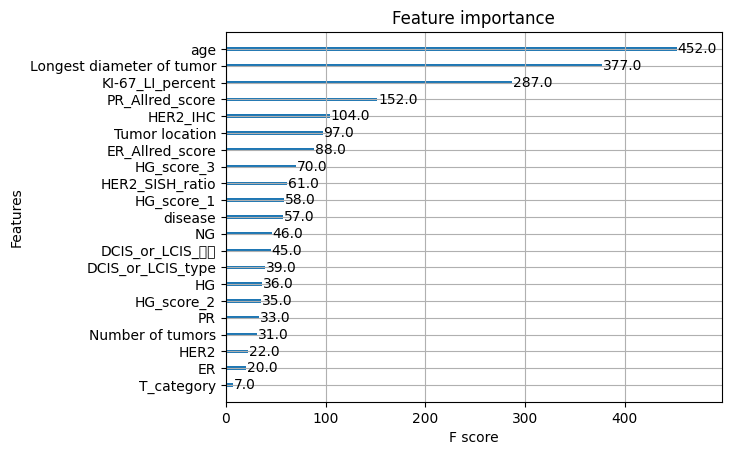

In [134]:
# XGBoost 모델 학습하기
model = xgb.XGBClassifier()
model.fit(X, y)

# feature importance 추출하기
importance = model.feature_importances_

# feature importance 시각화하기
plot_importance(model)
plt.show()

## 파라미터 최적화

In [197]:
from scipy.stats import uniform, randint
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_convergence
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
# Define search space
search_spaces = {
    'n_estimators': Integer(100, 2000),
    'max_depth': Integer(2, 10),
    'gamma': Real(0.1, 1.0, prior='log-uniform'),
    'min_child_weight': Integer(1, 7),
    'subsample': Real(0.3, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'colsample_bylevel': Real(0.5, 1.0),
    'colsample_bynode': Real(0.5, 1.0),
    'reg_lambda': Real(0.01, 1, prior='log-uniform'),
    'reg_alpha': Real(0.01, 1, prior='log-uniform'),
    'eta' : Real(0.01, 0.5),
}
early_stopping_rounds = 100
# Define classifier
clf = XGBClassifier(objective='binary:logistic',eval_metric='auc', booster='gbtree', 
                    random_state=42, use_label_encoder=False, n_jobs=-1)
evalset = [(X_train, y_train), (X_test,y_test)]
# Define search strategy
# K = 5 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
opt = BayesSearchCV(
    clf,
    search_spaces,
    n_iter=50,#50~100약한 학습기수
    scoring='f1',
    cv=cv,
    n_jobs=-1,
#     refit=True, # 가장 좋은 하이퍼파라미터로 모델을 다시 학습하여 저장
#     return_train_score=True # 학습 점수도 저장
)

# Fit the model
opt.fit(X_train, y_train, eval_set=evalset,early_stopping_rounds=early_stopping_rounds)

# Print best parameters and score
print("Best parameters: ", opt.best_params_)
print("Best score: ", opt.best_score_)

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

[0]	validation_0-auc:0.78246	validation_1-auc:0.73260
[1]	validation_0-auc:0.83456	validation_1-auc:0.77675
[2]	validation_0-auc:0.85381	validation_1-auc:0.79435
[3]	validation_0-auc:0.86196	validation_1-auc:0.80940
[4]	validation_0-auc:0.86391	validation_1-auc:0.81655
[5]	validation_0-auc:0.86625	validation_1-auc:0.82915
[6]	validation_0-auc:0.86867	validation_1-auc:0.83165
[7]	validation_0-auc:0.87143	validation_1-auc:0.83010
[8]	validation_0-auc:0.87209	validation_1-auc:0.82810
[9]	validation_0-auc:0.87059	validation_1-auc:0.82620
[10]	validation_0-auc:0.87146	validation_1-auc:0.82260
[11]	validation_0-auc:0.87476	validation_1-auc:0.82940
[12]	validation_0-auc:0.87682	validation_1-auc:0.83160
[13]	validation_0-auc:0.87762	validation_1-auc:0.83180
[14]	validation_0-auc:0.87710	validation_1-auc:0.83520
[15]	validation_0-auc:0.87722	validation_1-auc:0.83410
[16]	validation_0-auc:0.87686	validation_1-auc:0.83410
[17]	validation_0-auc:0.87700	validation_1-auc:0.83420
[18]	validation_0-au

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[69]	validation_0-auc:0.88575	validation_1-auc:0.84440
[70]	validation_0-auc:0.88563	validation_1-auc:0.84500
[71]	validation_0-auc:0.88563	validation_1-auc:0.84400
[72]	validation_0-auc:0.88610	validation_1-auc:0.84540
[73]	validation_0-auc:0.88610	validation_1-auc:0.84560
[74]	validation_0-auc:0.88606	validation_1-auc:0.84680
[75]	validation_0-auc:0.88605	validation_1-auc:0.84720
[76]	validation_0-auc:0.88645	validation_1-auc:0.84680
[77]	validation_0-auc:0.88640	validation_1-auc:0.84650
[78]	validation_0-auc:0.88653	validation_1-auc:0.84630
[79]	validation_0-auc:0.88648	validation_1-auc:0.84610
[80]	validation_0-auc:0.88644	validation_1-auc:0.84550
[81]	validation_0-auc:0.88640	validation_1-auc:0.84620
[82]	validation_0-auc:0.88607	validation_1-auc:0.84530
[83]	validation_0-auc:0.88598	validation_1-auc:0.84490
[84]	validation_0-auc:0.88608	validation_1-auc:0.84530
[85]	validation_0-auc:0.88649	validation_1-auc:0.84580
[86]	validation_0-auc:0.88654	validation_1-auc:0.84590
[87]	valid

[215]	validation_0-auc:0.89698	validation_1-auc:0.84820
[216]	validation_0-auc:0.89700	validation_1-auc:0.84830
[217]	validation_0-auc:0.89722	validation_1-auc:0.84860
[218]	validation_0-auc:0.89736	validation_1-auc:0.84860
[219]	validation_0-auc:0.89727	validation_1-auc:0.84860
[220]	validation_0-auc:0.89759	validation_1-auc:0.84880
[221]	validation_0-auc:0.89759	validation_1-auc:0.84900
[222]	validation_0-auc:0.89771	validation_1-auc:0.84830
[223]	validation_0-auc:0.89781	validation_1-auc:0.84840
[224]	validation_0-auc:0.89777	validation_1-auc:0.84820
[225]	validation_0-auc:0.89788	validation_1-auc:0.84820
[226]	validation_0-auc:0.89782	validation_1-auc:0.84820
[227]	validation_0-auc:0.89789	validation_1-auc:0.84860
[228]	validation_0-auc:0.89794	validation_1-auc:0.84870
[229]	validation_0-auc:0.89792	validation_1-auc:0.84840
[230]	validation_0-auc:0.89797	validation_1-auc:0.84770
[231]	validation_0-auc:0.89815	validation_1-auc:0.84740
[232]	validation_0-auc:0.89831	validation_1-auc:

In [198]:
best_estimator = opt.best_estimator_
pred = best_estimator.predict(X_test)
print('검증 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

검증 데이터 세트 정확도: 0.7800


## 검증 및 테스트

In [199]:
tunRc = xgb.XGBClassifier(**opt.best_params_, objective='binary:logistic', eval_metric='auc', booster='gbtree', random_state = 42, n_jobs=-1)

In [200]:
tunRc.fit(X_train, y_train,eval_set=evalset)


[0]	validation_0-auc:0.78246	validation_1-auc:0.73260
[1]	validation_0-auc:0.83456	validation_1-auc:0.77675
[2]	validation_0-auc:0.85381	validation_1-auc:0.79435
[3]	validation_0-auc:0.86196	validation_1-auc:0.80940
[4]	validation_0-auc:0.86391	validation_1-auc:0.81655
[5]	validation_0-auc:0.86625	validation_1-auc:0.82915
[6]	validation_0-auc:0.86867	validation_1-auc:0.83165
[7]	validation_0-auc:0.87143	validation_1-auc:0.83010
[8]	validation_0-auc:0.87209	validation_1-auc:0.82810
[9]	validation_0-auc:0.87059	validation_1-auc:0.82620
[10]	validation_0-auc:0.87146	validation_1-auc:0.82260
[11]	validation_0-auc:0.87476	validation_1-auc:0.82940
[12]	validation_0-auc:0.87682	validation_1-auc:0.83160
[13]	validation_0-auc:0.87762	validation_1-auc:0.83180
[14]	validation_0-auc:0.87710	validation_1-auc:0.83520
[15]	validation_0-auc:0.87722	validation_1-auc:0.83410
[16]	validation_0-auc:0.87686	validation_1-auc:0.83410
[17]	validation_0-auc:0.87700	validation_1-auc:0.83420
[18]	validation_0-au

[149]	validation_0-auc:0.89133	validation_1-auc:0.84990
[150]	validation_0-auc:0.89147	validation_1-auc:0.84960
[151]	validation_0-auc:0.89142	validation_1-auc:0.84920
[152]	validation_0-auc:0.89143	validation_1-auc:0.84950
[153]	validation_0-auc:0.89167	validation_1-auc:0.84950
[154]	validation_0-auc:0.89182	validation_1-auc:0.85000
[155]	validation_0-auc:0.89195	validation_1-auc:0.84940
[156]	validation_0-auc:0.89195	validation_1-auc:0.84900
[157]	validation_0-auc:0.89214	validation_1-auc:0.84940
[158]	validation_0-auc:0.89216	validation_1-auc:0.84930
[159]	validation_0-auc:0.89245	validation_1-auc:0.84920
[160]	validation_0-auc:0.89252	validation_1-auc:0.84960
[161]	validation_0-auc:0.89253	validation_1-auc:0.84970
[162]	validation_0-auc:0.89264	validation_1-auc:0.84990
[163]	validation_0-auc:0.89272	validation_1-auc:0.84950
[164]	validation_0-auc:0.89279	validation_1-auc:0.84990
[165]	validation_0-auc:0.89303	validation_1-auc:0.84950
[166]	validation_0-auc:0.89298	validation_1-auc:

[295]	validation_0-auc:0.90339	validation_1-auc:0.84800
[296]	validation_0-auc:0.90364	validation_1-auc:0.84800
[297]	validation_0-auc:0.90374	validation_1-auc:0.84790
[298]	validation_0-auc:0.90392	validation_1-auc:0.84820
[299]	validation_0-auc:0.90393	validation_1-auc:0.84840
[300]	validation_0-auc:0.90391	validation_1-auc:0.84820
[301]	validation_0-auc:0.90396	validation_1-auc:0.84860
[302]	validation_0-auc:0.90399	validation_1-auc:0.84870
[303]	validation_0-auc:0.90408	validation_1-auc:0.84850
[304]	validation_0-auc:0.90418	validation_1-auc:0.84790
[305]	validation_0-auc:0.90415	validation_1-auc:0.84770
[306]	validation_0-auc:0.90423	validation_1-auc:0.84750
[307]	validation_0-auc:0.90421	validation_1-auc:0.84790
[308]	validation_0-auc:0.90428	validation_1-auc:0.84820
[309]	validation_0-auc:0.90433	validation_1-auc:0.84850
[310]	validation_0-auc:0.90452	validation_1-auc:0.84850
[311]	validation_0-auc:0.90461	validation_1-auc:0.84910
[312]	validation_0-auc:0.90461	validation_1-auc:

[442]	validation_0-auc:0.91247	validation_1-auc:0.85180
[443]	validation_0-auc:0.91248	validation_1-auc:0.85180
[444]	validation_0-auc:0.91248	validation_1-auc:0.85190
[445]	validation_0-auc:0.91264	validation_1-auc:0.85170
[446]	validation_0-auc:0.91258	validation_1-auc:0.85170
[447]	validation_0-auc:0.91262	validation_1-auc:0.85160
[448]	validation_0-auc:0.91263	validation_1-auc:0.85160
[449]	validation_0-auc:0.91264	validation_1-auc:0.85140
[450]	validation_0-auc:0.91267	validation_1-auc:0.85180
[451]	validation_0-auc:0.91277	validation_1-auc:0.85190
[452]	validation_0-auc:0.91285	validation_1-auc:0.85190
[453]	validation_0-auc:0.91296	validation_1-auc:0.85170
[454]	validation_0-auc:0.91308	validation_1-auc:0.85150
[455]	validation_0-auc:0.91308	validation_1-auc:0.85150
[456]	validation_0-auc:0.91301	validation_1-auc:0.85150
[457]	validation_0-auc:0.91314	validation_1-auc:0.85140
[458]	validation_0-auc:0.91317	validation_1-auc:0.85130
[459]	validation_0-auc:0.91322	validation_1-auc:

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5936852526428937,
              colsample_bynode=0.9773905391289933, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False, eta=0.01,
              eval_metric='auc', feature_types=None, gamma=0.1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=477, n_jobs=-1, num_parallel_tree=None,
              predictor=None, ...)

In [201]:
y_pred = tunRc.predict(X_test)

In [202]:
print(classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds']))     #  X_train, X_test, y_train, y_test

              precision    recall  f1-score   support

   No Frauds       0.84      0.74      0.79       100
      Frauds       0.77      0.86      0.81       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [203]:
classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)

{'No Frauds': {'precision': 0.8409090909090909,
  'recall': 0.74,
  'f1-score': 0.7872340425531915,
  'support': 100},
 'Frauds': {'precision': 0.7678571428571429,
  'recall': 0.86,
  'f1-score': 0.8113207547169812,
  'support': 100},
 'accuracy': 0.8,
 'macro avg': {'precision': 0.8043831168831169,
  'recall': 0.8,
  'f1-score': 0.7992773986350863,
  'support': 200},
 'weighted avg': {'precision': 0.804383116883117,
  'recall': 0.8,
  'f1-score': 0.7992773986350863,
  'support': 200}}

In [204]:
f1score = classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)['macro avg']['f1-score']
f1score

0.7992773986350863

In [205]:
# plt.rc('font', family='Malgun Gothic') 

# fig, ax = plt.subplots(figsize=(10, 20))
# xgb.plot_importance(tunRc, ax=ax)
# plt.show()

In [206]:
y_pred = tunRc.predict(X_test)
predictions = [round(value) for value in y_pred]

In [207]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.2

In [208]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.00%


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.


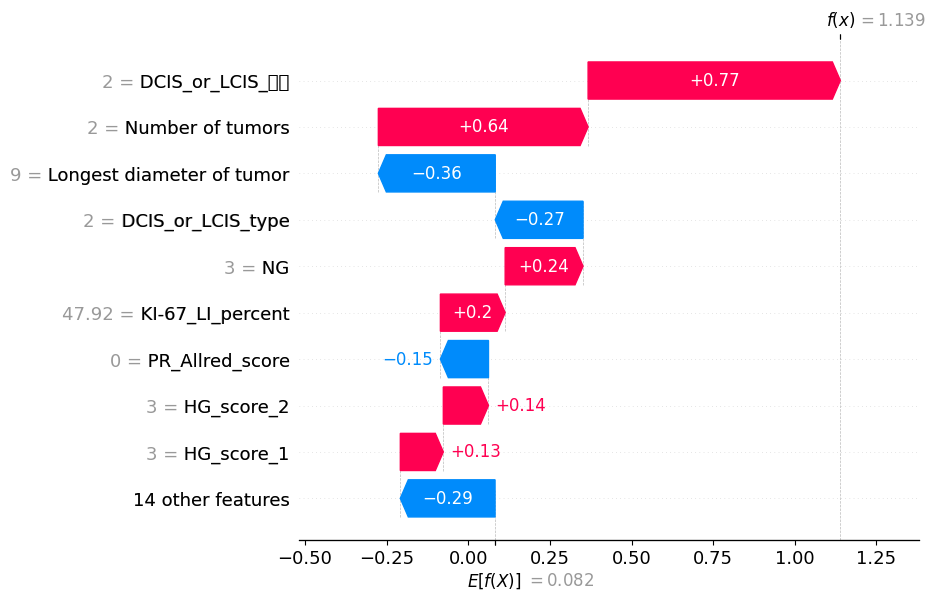

In [214]:
import shap
explain = shap.Explainer(tunRc)
shap_values = explain(X_train)
shap.plots.waterfall(shap_values[0])

https://zzinnam.tistory.com/entry/SHAP-value%EC%97%90-%EB%8C%80%ED%95%9C-%EA%B0%84%EB%8B%A8%ED%95%9C-%EC%86%8C%EA%B0%9Cwith-Python

In [216]:
shap.initjs()
shap.plots.force(shap_values[0])

In [217]:
shap.plots.force(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.


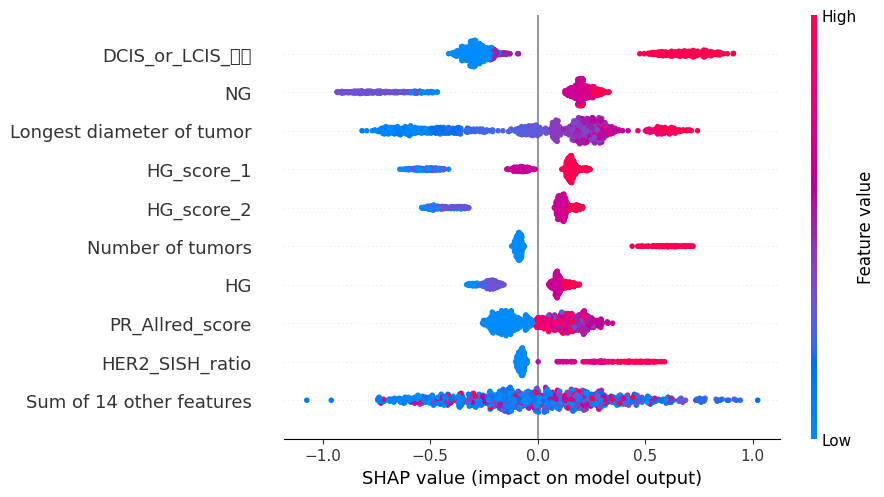

In [227]:
shap.plots.beeswarm(shap_values)

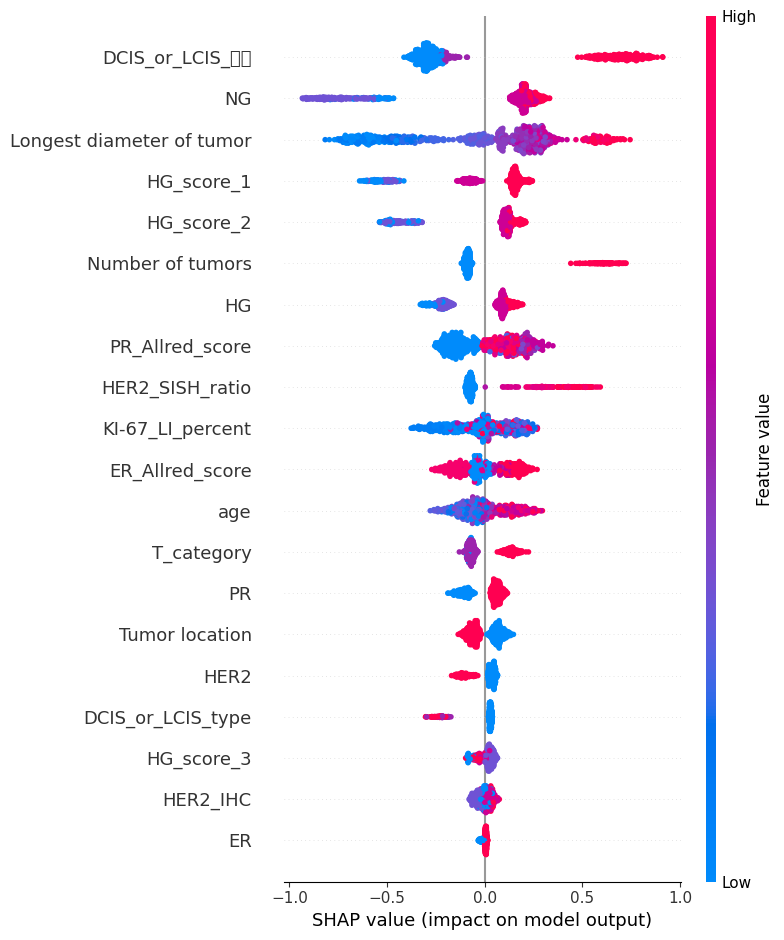

In [232]:
# summary
shap.summary_plot(shap_values, X_train)

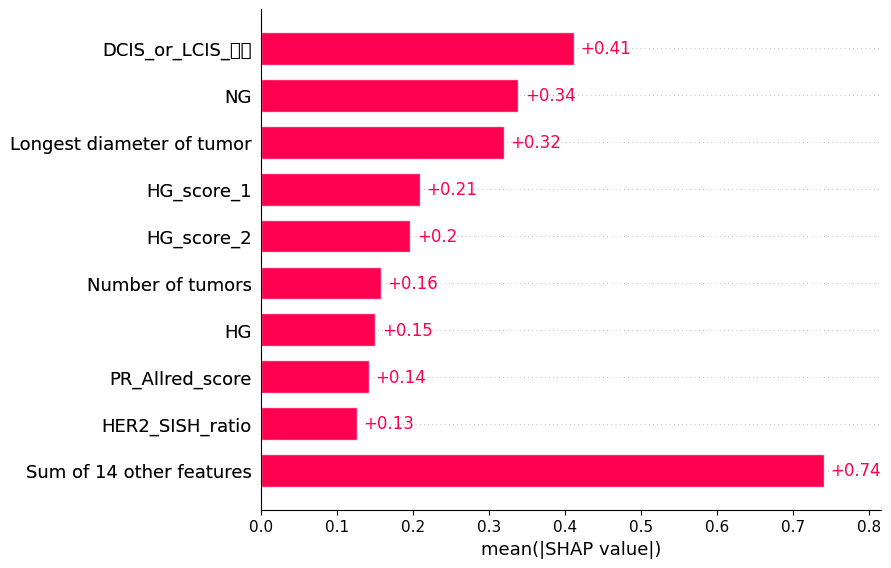

In [238]:
shap.plots.bar(shap_values)

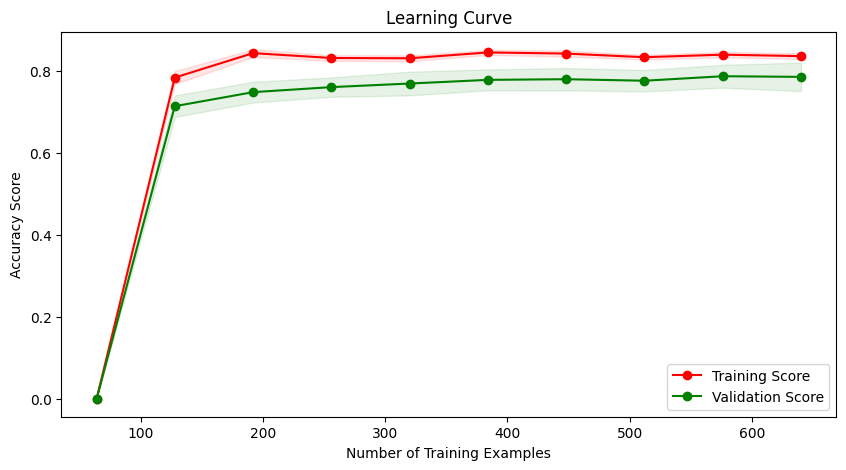

In [209]:
# Compute the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    tunRc, X_train, y_train, cv=5, scoring='f1',n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

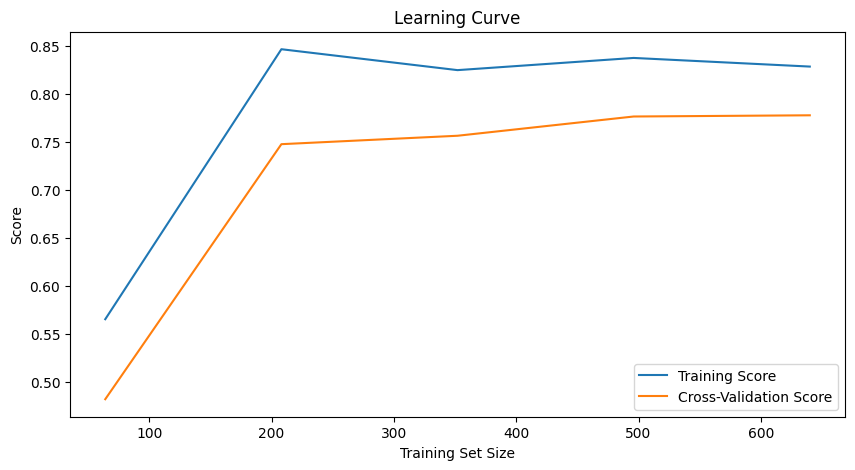

In [210]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(tunRc, X_train, y_train, cv=5)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [211]:
y_pred_t = tunRc.predict(df_t)
y_pred_t

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0])

In [172]:
submission = pd.read_csv('./openData/sample_submission.csv')
submission

,ID,N_category
0,BC_01_0011,0
1,BC_01_0220,0
2,BC_01_0233,0
3,BC_01_0258,0
4,BC_01_0260,0
...,...,...
245,BC_01_3328,0
246,BC_01_3404,0
247,BC_01_3418,0
248,BC_01_3438,0


In [173]:
submission['N_category'] = y_pred_t


In [174]:
y_pred_t

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0])

In [178]:
submission.to_csv('./openData/sample_submission1.csv',index=False)